# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

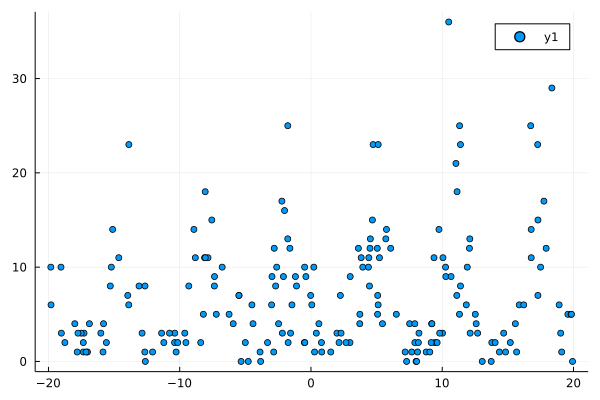

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -619.1652833175145
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.746813 seconds (6.81 M allocations: 414.467 MiB, 3.04% gc time, 98.15% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.398812872038389, 0.5753579157720667, 0.6925654793743554, 0.47770976923493436, 0.39761817493486745, 0.4275208804178759, 0.20671592649065537, 0.34496029072925966, 0.19147725449654412, 0.22900473592505444  …  0.3125800860000132, 0.4714696472893534, 0.443197894677602, 0.39508536188931925, 0.24501376730553934, 0.2876831907808512, 0.3215816639149304, 0.5174643022395882, 0.2530117522991672, 0.24768560012293672], θ = [2.9608594920660574, 8.273026359680193, 3.366502504568087, 5.88844182963965, 7.896239997607836, 8.865379404177931, 4.982270973946272, 7.426500995429651, 3.4893455291511635, 5.973915203863777  …  3.9677463320179354, 3.436576699073658, 7.379599180095892, 7.897537437696185, 3.9801088196444665, 7.44869852609522, 2.478675754038984, 13.695746854531516, 5.470846428271273, 6.46697235230018]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTuple

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -744.477092498166
[ Info: Training ended after 20 iterations. Total number of iterations 20
  1.915330 seconds (4.34 M allocations: 302.674 MiB, 5.94% gc time, 94.41% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.95364106521758) infered by Analytic Variational Inference , (local_vars = (c = [0.6253419104915211, 0.5336856906440174, 0.8797608108944267, 0.39248979323274324, 0.2817780307312728, 0.323259683863511, 0.36828692560639403, 0.24730347482912723, 0.3179844642180756, 0.4026287511248858  …  0.5168420506080597, 0.6671721177140537, 0.3360714394939126, 0.27898097247975806, 0.1365410861349995, 0.16903500270752636, 0.5431094405981983, 0.451555341487815, 0.20496328658668853, 0.15654676456026478], θ = [5.137931084310645, 8.592689047085948, 5.842363473637635, 6.494232922550705, 8.712211040358039, 9.586216663811195, 6.760885528686804, 8.560399847585698, 5.187356218256165, 7.78325002314652  …  5.9732301102683305, 5.635460940109907, 8.078495299724834, 8.717501547833225, 5.212809084020931, 8.600970226795923, 4.546210561189337, 14.188934785269957, 6.838046870677102, 7.729162481669401], γ = [9.60856658789118, 5.591350394536042, 10.428825470736

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

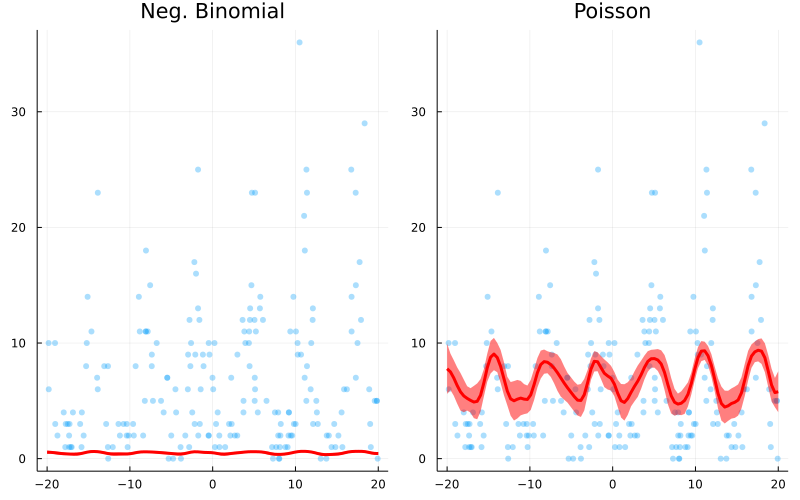

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*